In [88]:
from sympy import conjugate, init_printing, factor, symbols, lambdify
from sympy.physics.quantum import Dagger
from DLRSM1.block_diagonalization_iss import ULmni, URmni, USmni, mNi_changes, mNi, I3
from DLRSM1.mixing_lambdify_iss import eigenvalsMnu

init_printing()

In [2]:
mNi

In [3]:
mNi_changes_degenerate = {
        mNi[4]:mNi[3],
        mNi[5]:mNi[3],
        mNi[6]:mNi[3],
        mNi[7]:mNi[3],
        mNi[8]:mNi[3]
    }

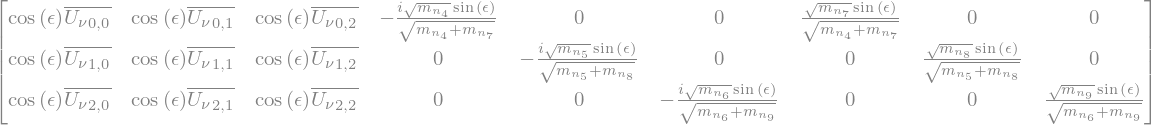

In [4]:
ULmni

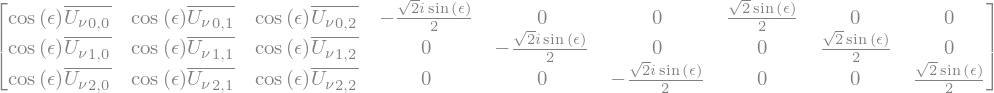

In [5]:
ULmni.subs(
    mNi_changes_degenerate
)

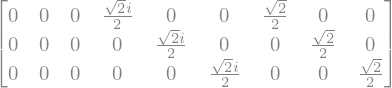

In [6]:
URmni.subs(
    mNi_changes_degenerate
)

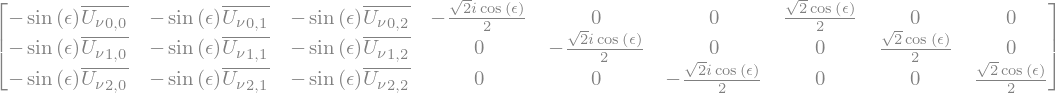

In [7]:
USmni.subs(
    mNi_changes_degenerate
)

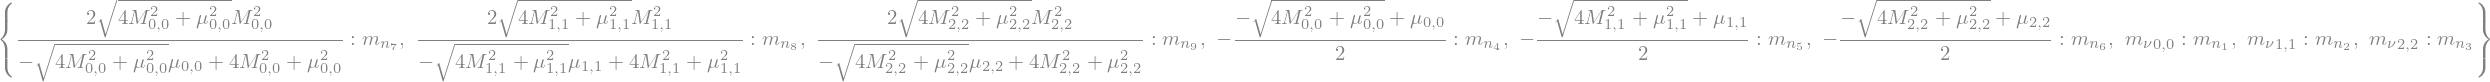

In [8]:
mNi_changes

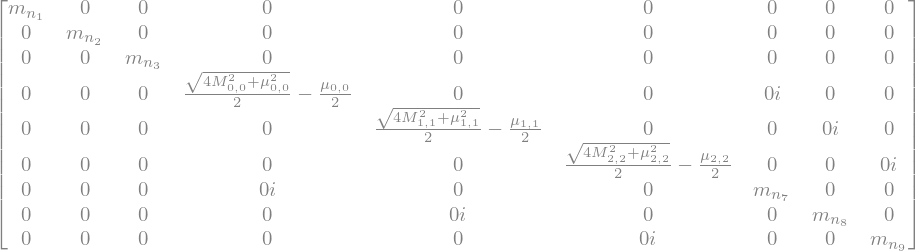

In [9]:
eigenvalsMnu.subs(mNi_changes)

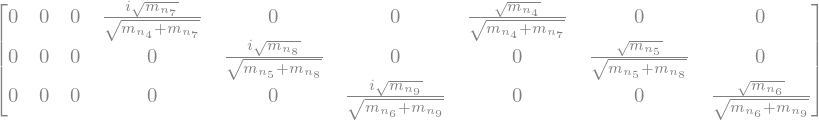

In [10]:
URmni#.T*conjugate(URmni)*Dagger(ULmni)*ULmni

In [11]:
from DLRSM1.mixing_lambdify_iss import Kmat, TRLmat, Jmat, QLmat, QRmat, OmegaRLmat, OmegaSRmat, GRLmat, Unu
from neutrinos import UpmnsStandardParametrization, NuOscObservables
Nudata = NuOscObservables
from DLRSM1.potential_senjanovic_HiggsDoublets import epsilon
import mpmath as mp


In [12]:
th12,th13,th23 = symbols(r'\theta_{12}, \theta_{13}, \theta_{23}')
mixing_angles = Nudata().substitutions(th12,th13,th23)

Upmns_val = UpmnsStandardParametrization(th12,th13,th23).subs(mixing_angles)

Unu_changes = {
        Unu[i,j]:Upmns_val[i,j] for i in range(3) for j in range(3)
    }

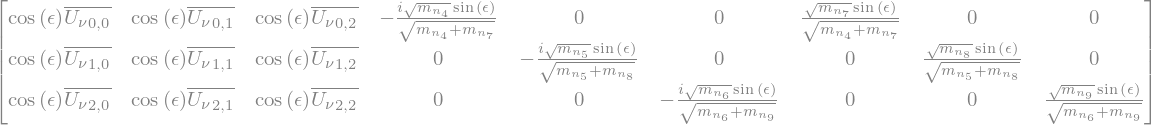

In [13]:
QLmat

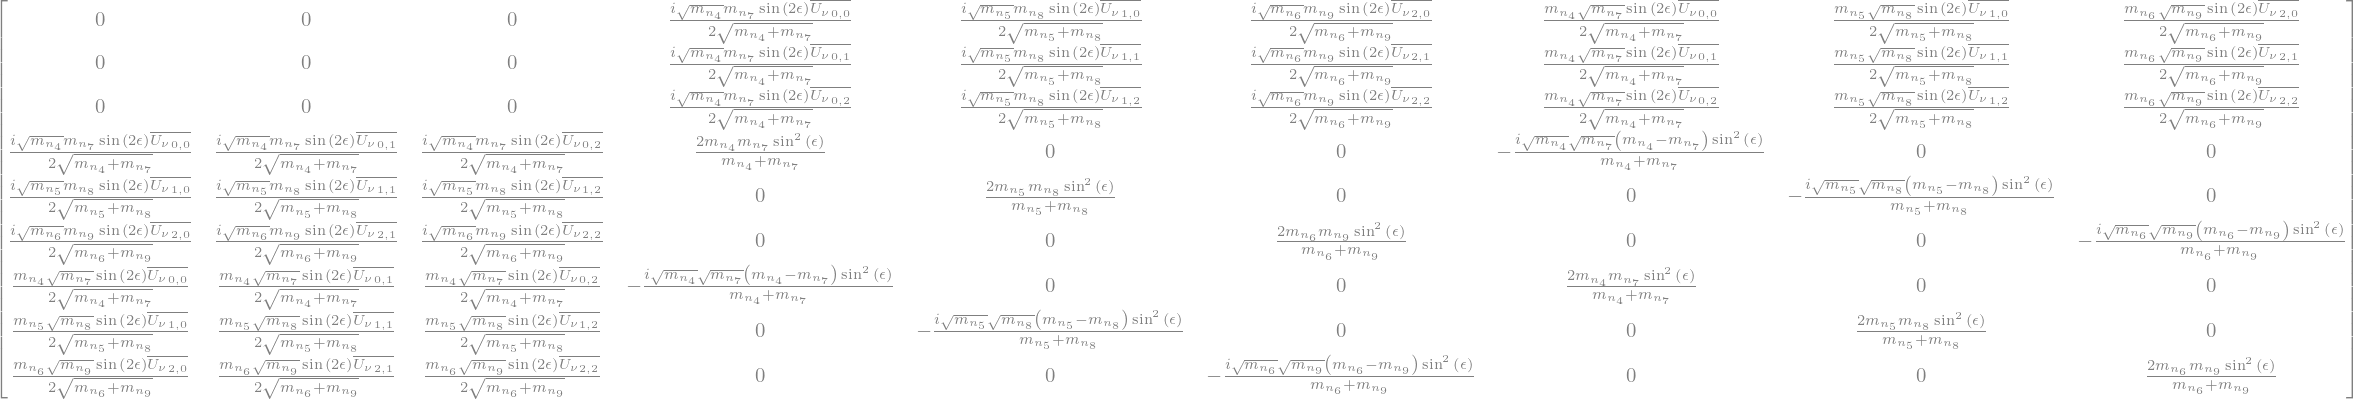

In [14]:
OmegaRLmat

In [15]:
from DLRSM1.potential_senjanovic_HiggsDoublets import epsilon
from sympy import sin, cos
import mpmath as mp
mp.dps = 120; mp.pretty = True

In [16]:
matrix_dict = {
    'K': Kmat, 'TRL': TRLmat, 'J': Jmat, 'QL': QLmat, 'QR': QRmat, 'OmegaRL': OmegaRLmat, 'OmegaSR': OmegaSRmat
}

K: 


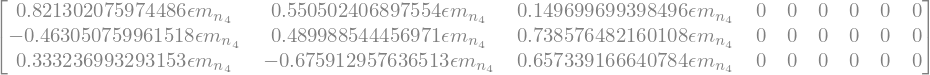

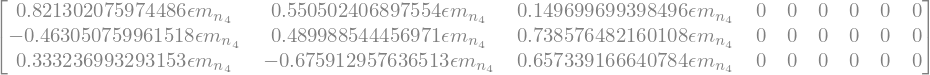

TRL: 


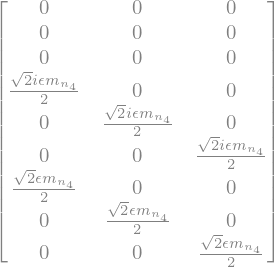

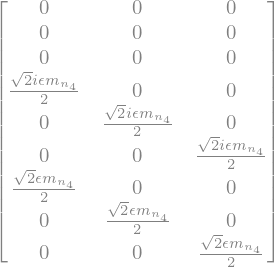

J: 


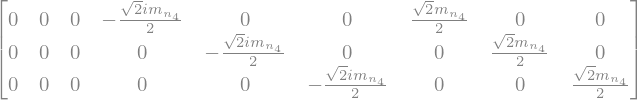

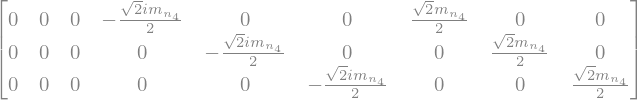

QL: 


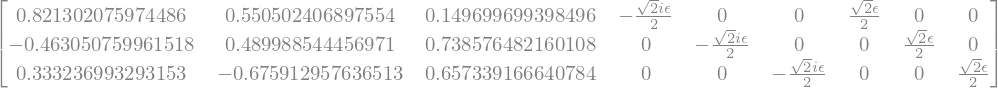

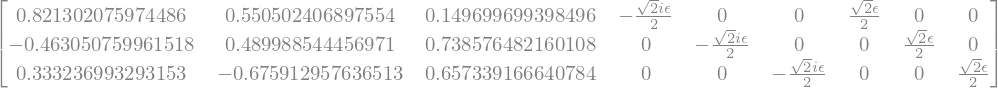

QR: 


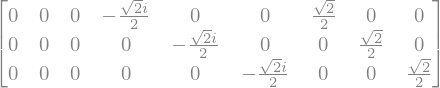

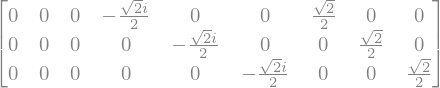

OmegaRL: 


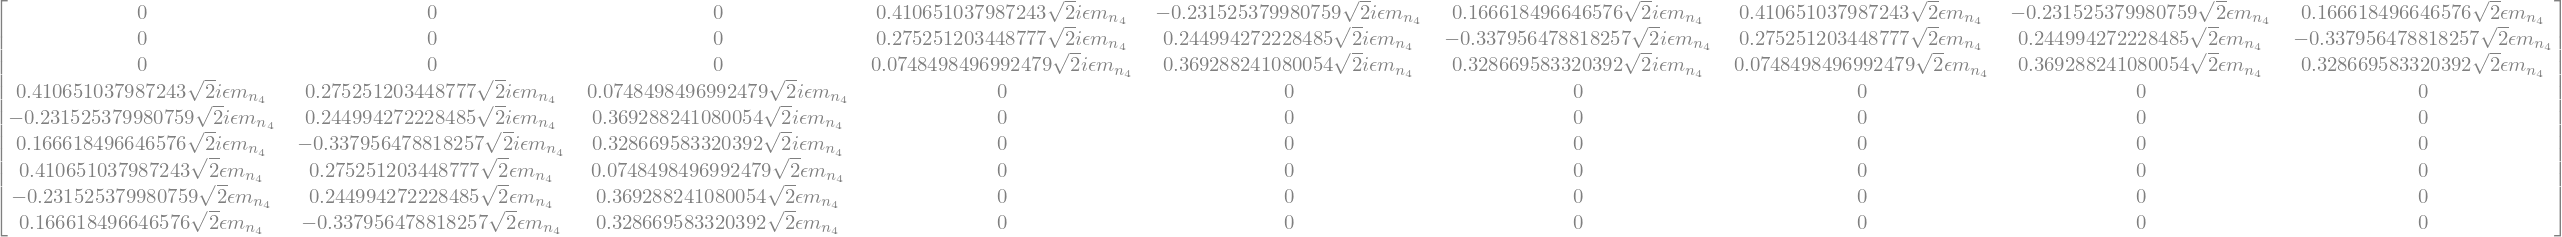

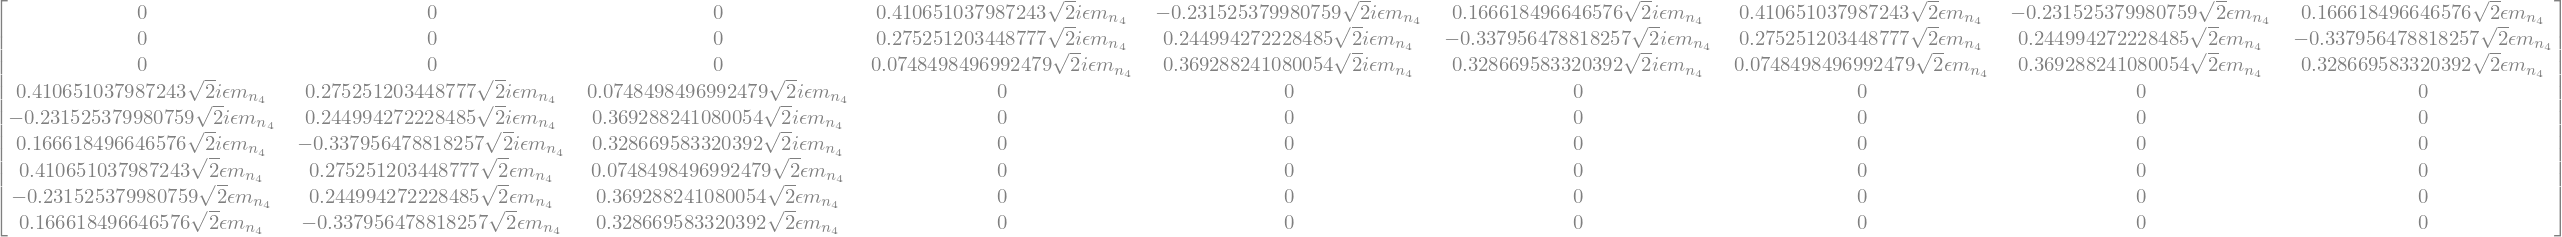

OmegaSR: 


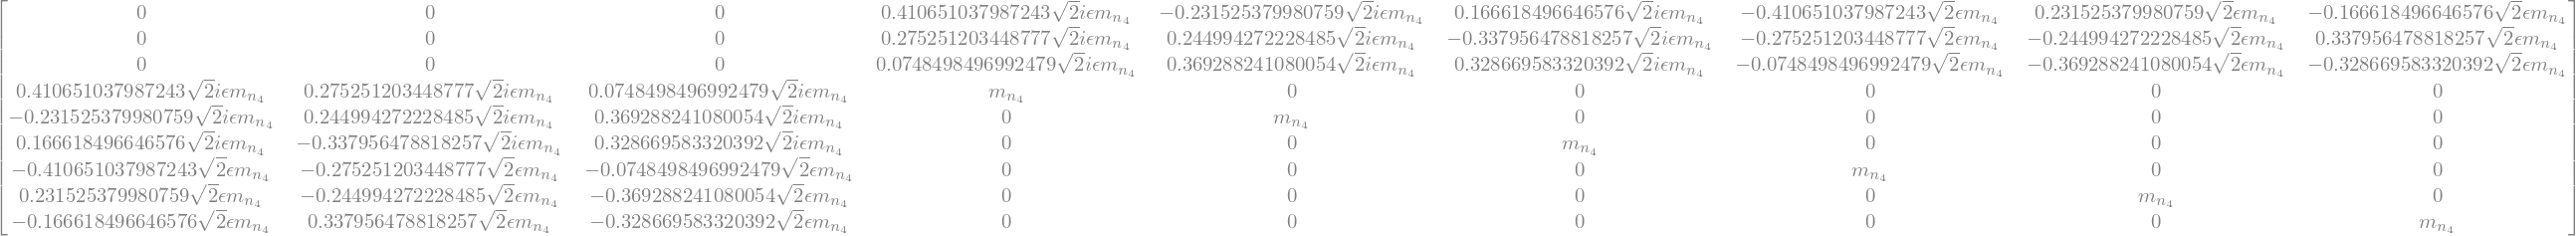

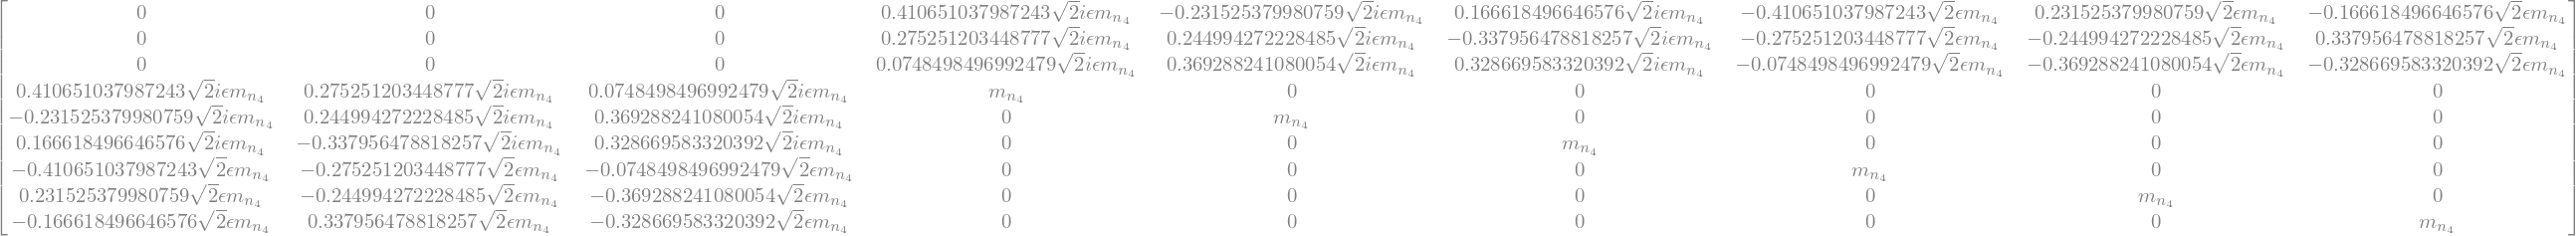

In [35]:
for name, matriz in matrix_dict.items():
    print(f"{name}: ")
    display(matriz)
    display(
        matriz.subs(Unu_changes).subs(mNi_changes_degenerate).applyfunc(
    lambda x:x.series(
    epsilon, 0, n=3
).removeO()
)
        )  # Display the matrix with epsilon set to 0

In [36]:
for name, matriz in matrix_dict.items():
    matrix_simple = matriz.subs(Unu_changes).subs(mNi_changes_degenerate).applyfunc(
    lambda x:x.series(
    epsilon, 0, n=3
).removeO()
    ).replace(epsilon**2, 0)
    matrix_dict[name] = matrix_simple

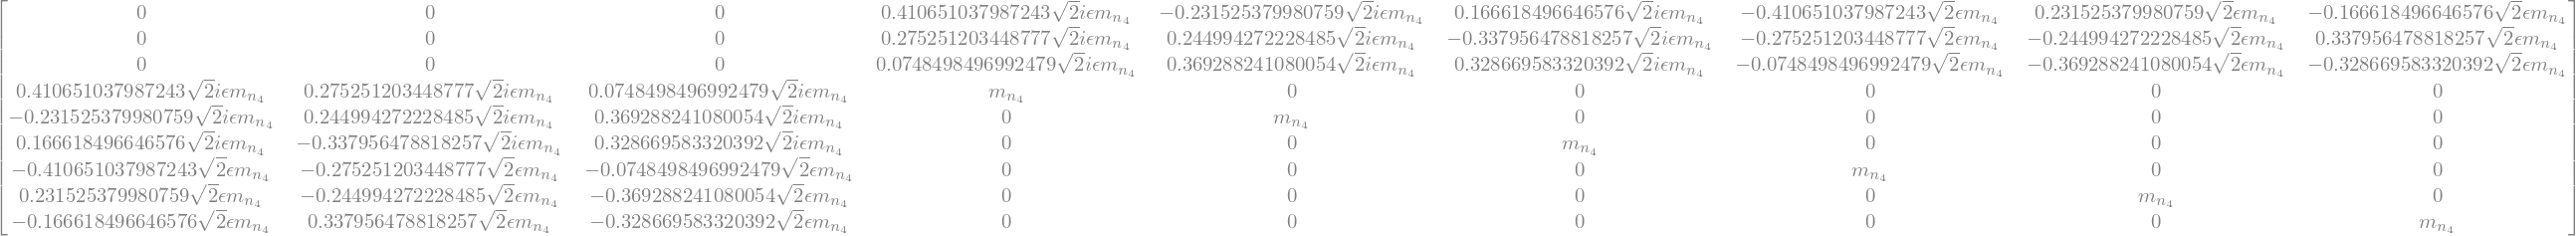

In [37]:
matrix_dict['OmegaSR']

In [38]:
K_lam = lambdify([epsilon, mNi[3]], matrix_dict['K'], 'mpmath')
K_lam(0.1, 1000)*Dagger(K_lam(0.1, 1000))

matrix(
[['10000.0', '-6.68897589124962e-13', '7.2005437484182e-13'],
 ['-6.68897589124962e-13', '10000.0', '5.66287352237008e-14'],
 ['7.2005437484182e-13', '5.66287352237008e-14', '10000.0']])

In [40]:
from sympy import Symbol, Matrix

In [42]:
matrix_dict_lamb = {}
for name, matriz in matrix_dict.items():
    print(name, matriz.atoms(Symbol))
    matrix_lamb = lambdify([epsilon, mNi[3]], matriz, 'mpmath')
    matrix_dict_lamb[name] = matrix_lamb

K {m_{n_4}, epsilon}
TRL {m_{n_4}, epsilon}
J {m_{n_4}}
QL {epsilon}
QR set()
OmegaRL {m_{n_4}, epsilon}
OmegaSR {m_{n_4}, epsilon}


In [43]:
mp.chop(matrix_dict_lamb['QR'](0,0))

matrix(
[['0.0', '0.0', '0.0', mpc(real='0.0', imag='-0.70710678118654757'), '0.0', '0.0', '0.707106781186548', '0.0', '0.0'],
 ['0.0', '0.0', '0.0', '0.0', mpc(real='0.0', imag='-0.70710678118654757'), '0.0', '0.0', '0.707106781186548', '0.0'],
 ['0.0', '0.0', '0.0', '0.0', '0.0', mpc(real='0.0', imag='-0.70710678118654757'), '0.0', '0.0', '0.707106781186548']])

In [44]:
vR_val = mp.mpf('1e3')
eps_val = mp.mpf('246')/mp.mpf('1e4')
mN = mp.mpf('1e3')
K_val = matrix_dict_lamb['K'](eps_val, mN)
mp.chop(K_val * K_val.H, tol=1e-9)

matrix(
[['605.16', '0.0', '0.0'],
 ['0.0', '605.16', '0.0'],
 ['0.0', '0.0', '605.16']])

In [45]:
for vR_val in [mp.mpf(f'1e{n}') for n in range(3, 15)]:
    eps_val = mp.mpf('246')/vR_val
    mN = vR_val
    K_val = matrix_dict_lamb['K'](eps_val, mN)
    M = K_val* K_val.H
    norm = mp.norm(M)/3
    print(mp.chop(norm, tol=1e-9))

34938.9288902794
34938.9288902794
34938.9288902794
34938.9288902794
34938.9288902794
34938.9288902794
34938.9288902794
34938.9288902794
34938.9288902794
34938.9288902794
34938.9288902794
34938.9288902794


In [46]:
for name, matrix_lamb in matrix_dict_lamb.items():
    print(name)
    for vR_val in [mp.mpf(f'1e{n}') for n in range(3, 15)]:
        eps_val = mp.mpf('246')/vR_val
        mN = vR_val
        M_val = matrix_lamb(eps_val, mN)
        M = M_val* M_val.H
        norm = mp.norm(M)/3
        print(mp.chop(norm, tol=1e-9))

K
34938.9288902794
34938.9288902794
34938.9288902794
34938.9288902794
34938.9288902794
34938.9288902794
34938.9288902794
34938.9288902794
34938.9288902794
34938.9288902794
34938.9288902794
34938.9288902794
TRL
34938.9288902794
34938.9288902794
34938.9288902794
34938.9288902794
34938.9288902794
34938.9288902794
34938.9288902794
34938.9288902794
34938.9288902794
34938.9288902794
34938.9288902794
34938.9288902794
J
577350.269189626
57735026.9189626
5773502691.89626
577350269189.626
57735026918962.6
5.77350269189626e+15
5.77350269189626e+17
5.77350269189626e+19
5.77350269189626e+21
5.77350269189626e+23
5.77350269189626e+25
5.77350269189626e+27
QL
0.612289198079905
0.577699658478529
0.577353763082515
0.577350304128555
0.577350269539015
0.57735026919312
0.577350269189661
0.577350269189626
0.577350269189626
0.577350269189626
0.577350269189626
0.577350269189626
QR
0.577350269189626
0.577350269189626
0.577350269189626
0.577350269189626
0.577350269189626
0.577350269189626
0.577350269189626
0.577

In [47]:
# Compute a metric for numerical instability for each matrix in matrix_dict_lamb
# We'll use the condition number (ratio of largest to smallest singular value) as the metric

for name, matrix_lamb in matrix_dict_lamb.items():
    print(f"{name}:")
    for vR_val in [mp.mpf(f'1e{n}') for n in range(3, 15)]:
        eps_val = mp.mpf('246') / vR_val
        mN = vR_val
        M_val = matrix_lamb(eps_val, mN)
        # Compute singular values
        try:
            svals = mp.svd(M_val, compute_uv=False)
            # Avoid division by zero
            if min(svals) == 0:
                cond = mp.inf
            else:
                cond = max(svals) / min(svals)
        except Exception as e:
            cond = f"Error: {e}"
        print(f"  vR={vR_val}: condition number = {cond}")

K:
  vR=1000.0: condition number = 1.0
  vR=10000.0: condition number = 1.0
  vR=100000.0: condition number = 1.0
  vR=1000000.0: condition number = 1.0
  vR=10000000.0: condition number = 1.0
  vR=100000000.0: condition number = 1.0
  vR=1000000000.0: condition number = 1.0
  vR=10000000000.0: condition number = 1.0
  vR=100000000000.0: condition number = 1.0
  vR=1000000000000.0: condition number = 1.0
  vR=10000000000000.0: condition number = 1.0
  vR=100000000000000.0: condition number = 1.0
TRL:
  vR=1000.0: condition number = 1.0
  vR=10000.0: condition number = 1.0
  vR=100000.0: condition number = 1.0
  vR=1000000.0: condition number = 1.0
  vR=10000000.0: condition number = 1.0
  vR=100000000.0: condition number = 1.0
  vR=1000000000.0: condition number = 1.0
  vR=10000000000.0: condition number = 1.0
  vR=100000000000.0: condition number = 1.0
  vR=1000000000000.0: condition number = 1.0
  vR=10000000000000.0: condition number = 1.0
  vR=100000000000000.0: condition number = 

$-  \frac{\sigma_{\text{max}}}{\sigma_{\text{min}}}$

In [28]:
OmegaRL_det = OmegaRLmat.berkowitz_det()

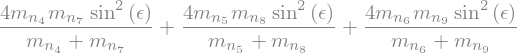

In [29]:
OmegaRLmat.trace()

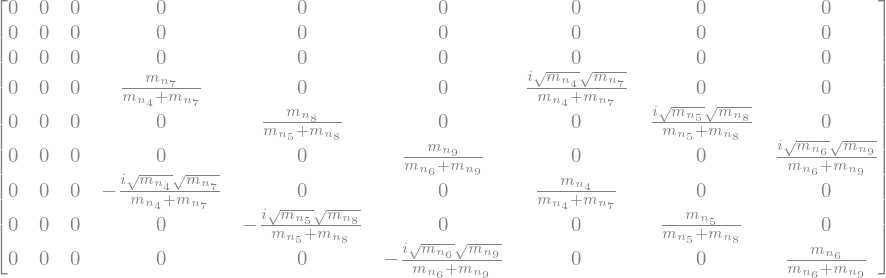

In [48]:
UR_left = URmni.T*conjugate(URmni)
UR_left

In [49]:
from sympy import block_collapse

In [65]:
UnuDaggerUnu = block_collapse(Dagger(Unu)*Unu).as_explicit()
UnuUnuDagger = block_collapse(Unu*Dagger(Unu)).as_explicit()
unitarity_conditions_UnuDaggerUnu = {
    UnuDaggerUnu[0,0]: 1,
    UnuDaggerUnu[1,1]: 1,
    UnuDaggerUnu[2,2]: 1,
    UnuDaggerUnu[0,1]: 0,
    UnuDaggerUnu[0,2]: 0,
    UnuDaggerUnu[1,0]: 0,
    UnuDaggerUnu[1,2]: 0,
    UnuDaggerUnu[2,0]: 0,
    UnuDaggerUnu[2,1]: 0
}
unitarity_conditions_UnuUnuDagger = {
    UnuUnuDagger[0,0]: 1,
    UnuUnuDagger[1,1]: 1,
    UnuUnuDagger[2,2]: 1,
    UnuUnuDagger[0,1]: 0,
    UnuUnuDagger[0,2]: 0,
    UnuUnuDagger[1,0]: 0,
    UnuUnuDagger[1,2]: 0,
    UnuUnuDagger[2,0]: 0,
    UnuUnuDagger[2,1]: 0
} 
unitarity_conditions_UnuDaggerUnu

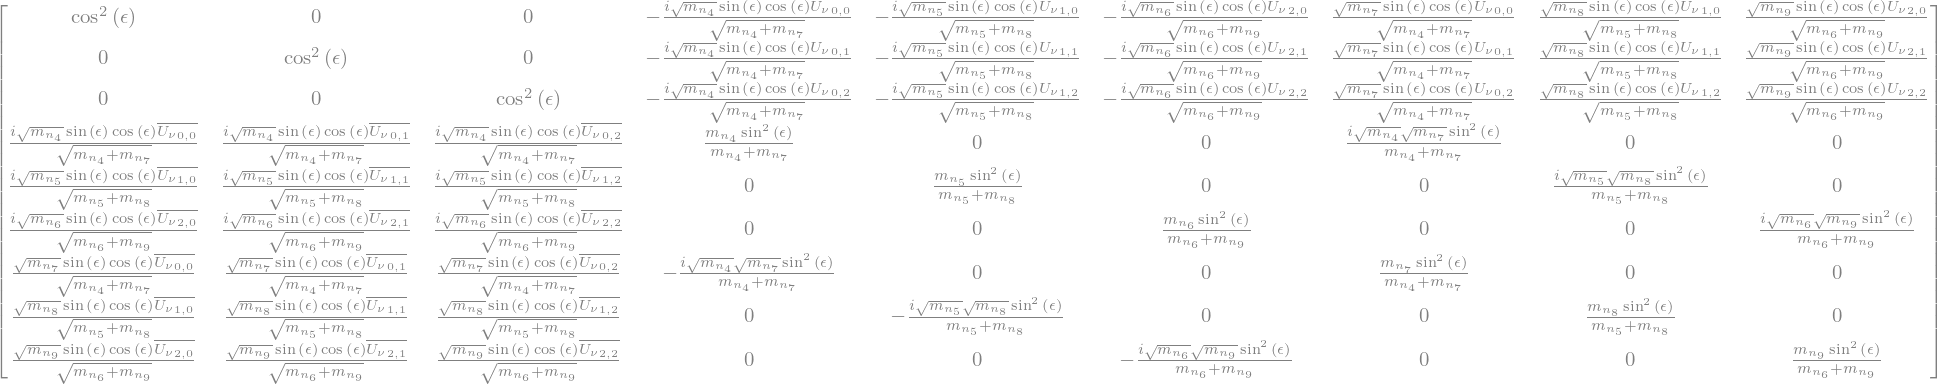

In [63]:
UL_right = (Dagger(ULmni)*ULmni).applyfunc(lambda x:x.factor()).subs(unitarity_conditions_UnuDaggerUnu)
UL_right

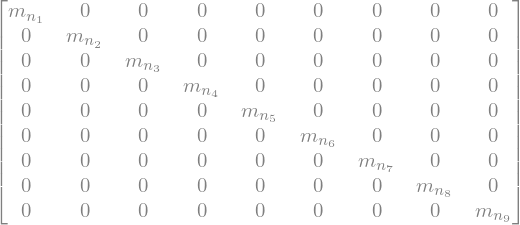

In [52]:
Mdiag = Matrix(
    [
        [mNi[0], 0, 0, 0, 0, 0, 0, 0, 0],
        [0, mNi[1], 0, 0, 0, 0, 0, 0, 0],
        [0, 0, mNi[2], 0, 0, 0, 0, 0, 0],
        [0, 0, 0, mNi[3], 0, 0, 0, 0, 0],
        [0, 0, 0, 0, mNi[4], 0, 0, 0, 0],
        [0, 0, 0, 0, 0, mNi[5], 0, 0, 0],
        [0, 0, 0, 0, 0, 0, mNi[6], 0, 0],
        [0, 0, 0, 0, 0, 0, 0, mNi[7], 0],
        [0, 0, 0, 0, 0, 0, 0, 0, mNi[8]]
    ]
)
Mdiag

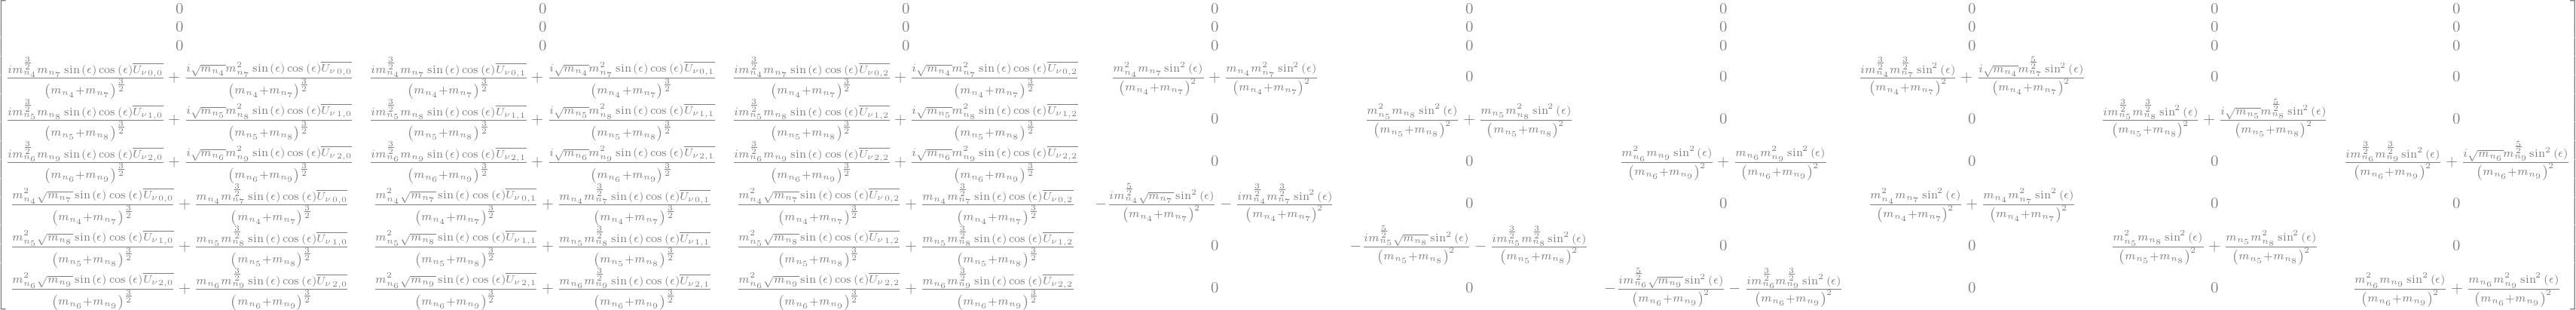

In [66]:
OmegaRLmat_alt = (UR_left*Mdiag*UL_right)
OmegaRLmat_alt

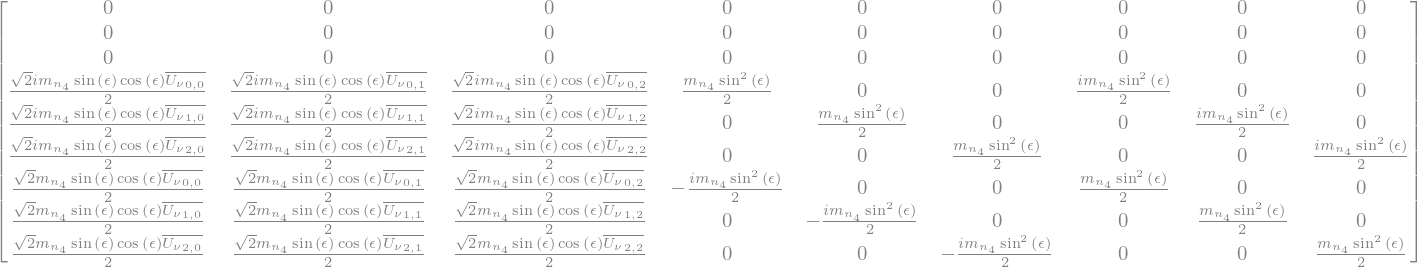

In [73]:
OmegaRLmat_alt_degenerate = OmegaRLmat_alt.subs(mNi_changes_degenerate).applyfunc(lambda x:x.factor())
OmegaRLmat_alt_degenerate

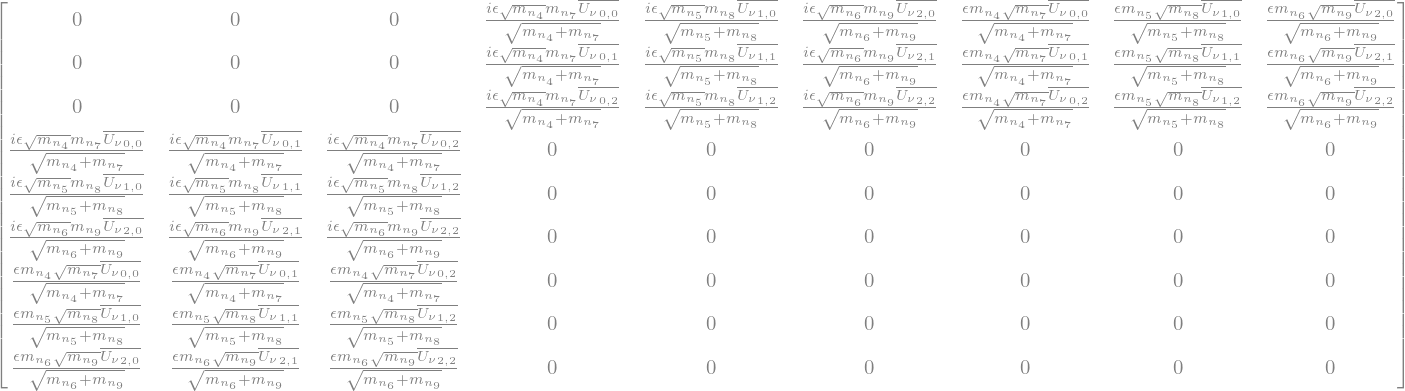

In [80]:
(OmegaRLmat_alt + OmegaRLmat_alt.T).applyfunc(lambda x:x.series(epsilon, 0, 3).removeO().factor()).replace(
    epsilon**2, 0
)

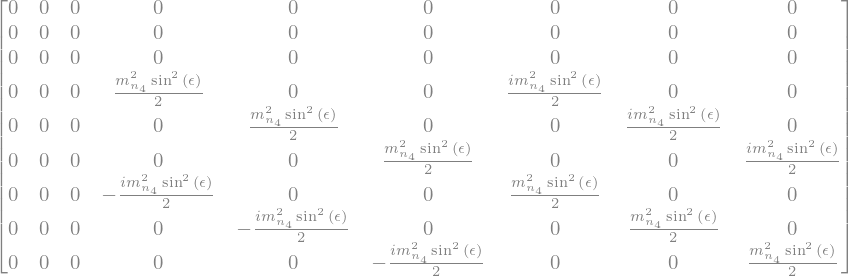

In [70]:
(OmegaRLmat_alt*Dagger(OmegaRLmat_alt)).subs(mNi_changes_degenerate).applyfunc(lambda x:x.collect(
    cos(epsilon), lambda x:x.factor()
)).subs(
    unitarity_conditions_UnuDaggerUnu
).subs(unitarity_conditions_UnuUnuDagger).simplify()

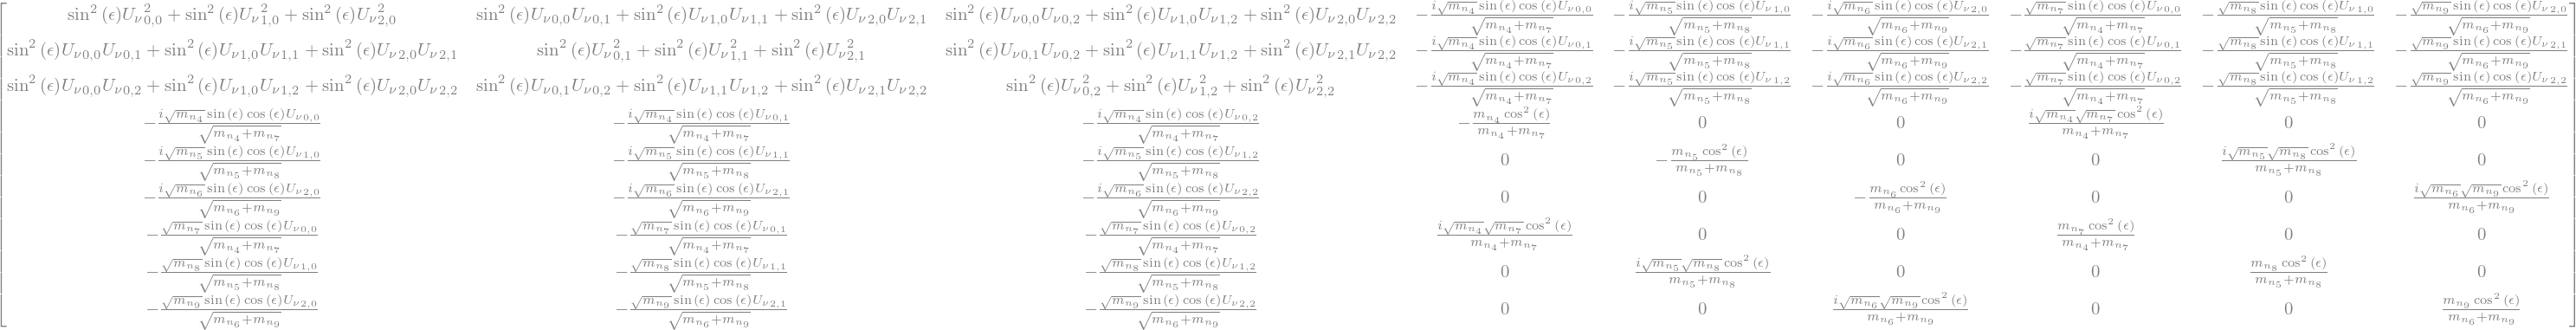

In [78]:
US_left = Dagger(USmni)*conjugate(USmni)
US_left

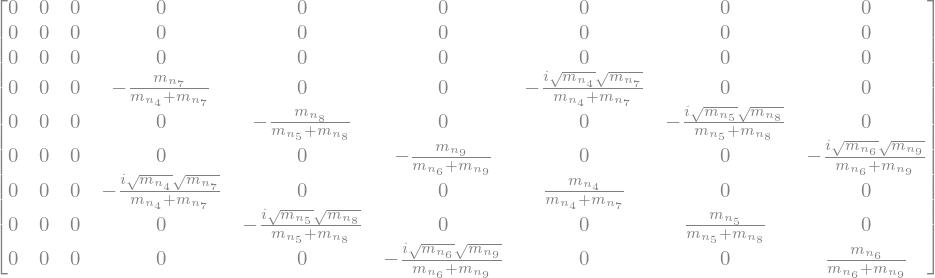

In [81]:
UR_right = Dagger(URmni)*conjugate(URmni)
UR_right

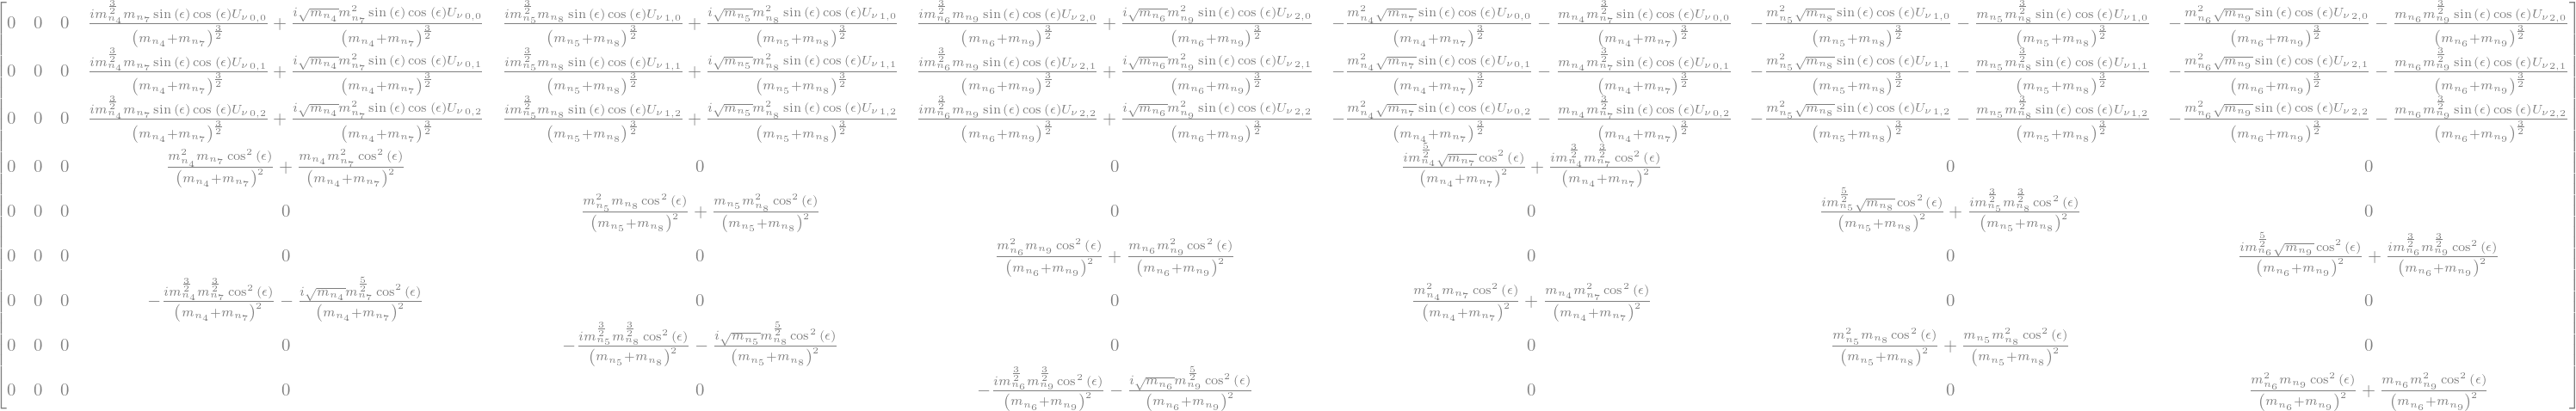

In [82]:
OmegaSRmat_alt = (US_left*Mdiag*UR_right)
OmegaSRmat_alt

In [94]:
from sympy import sqrt

In [97]:
s = 0
for i in range(9):
    for j in range(9):
        s += OmegaRLmat[i,j]**2

In [100]:
s.subs(mNi_changes_degenerate).simplify()

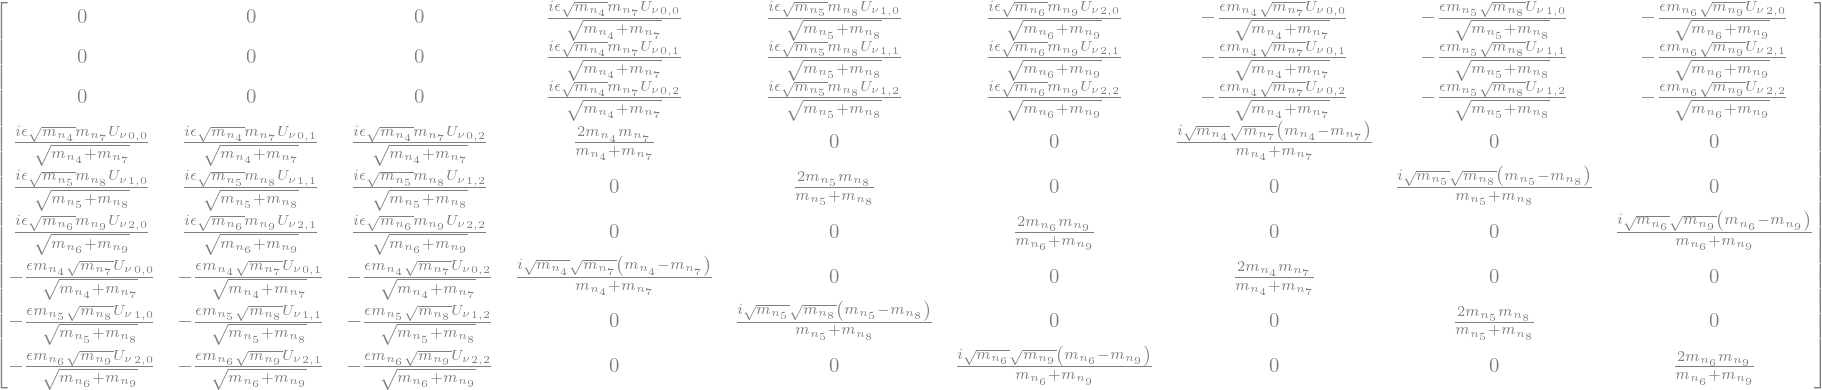

In [85]:
(OmegaSRmat_alt + OmegaSRmat_alt.T).applyfunc(lambda x:x.series(epsilon, 0, 3).removeO().expand()).replace(
    epsilon**2, 0
).applyfunc(lambda x:x.factor())

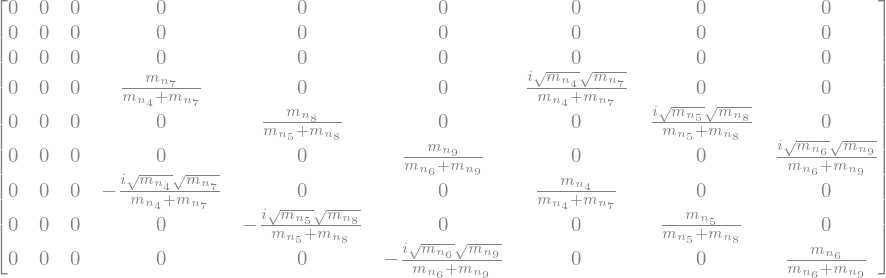

In [86]:

UR_left2 = URmni.T*conjugate(URmni)
UR_left2

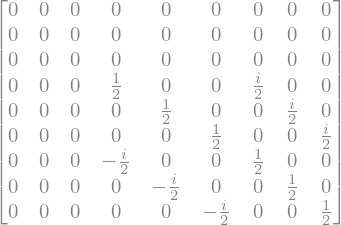

In [87]:
UR_left2.subs(mNi_changes_degenerate)

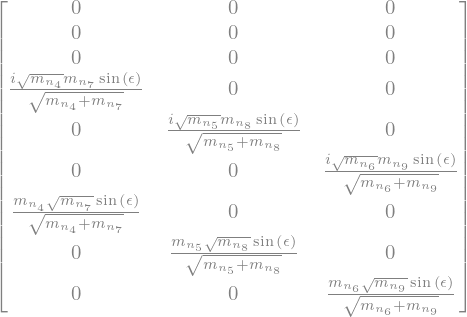

In [90]:
(UR_left2*Mdiag*Dagger(ULmni)*I3).applyfunc(lambda x:x.factor())